# **TikTok Project**
**Course 4 - The Power of Statistics**

You are a data professional at TikTok. The current project is reaching its midpoint; a project proposal, Python coding work, and exploratory data analysis have all been completed.

The team has reviewed the results of the exploratory data analysis and the previous executive summary the team prepared. You received an email from Orion Rainier, Data Scientist at TikTok, with your next assignment: determine and conduct the necessary hypothesis tests and statistical analysis for the TikTok classification project.

A notebook was structured and prepared to help you in this project. Please complete the following questions.


# **Course 4 End-of-course project: Data exploration and hypothesis testing**

In this activity, you will explore the data provided and conduct hypothesis testing.
<br/>

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze hypothesis tests.

**The goal** is to apply descriptive and inferential statistics, probability distributions, and hypothesis testing in Python.
<br/>

*This activity has three parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct hypothesis testing
* How will descriptive statistics help you analyze your data?

* How will you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerge from your hypothesis test?

* What business recommendations do you propose based on your results?

<br/>

Follow the instructions and answer the questions below to complete the activity. Then, complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Data exploration and hypothesis testing**



# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.



## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below to craft your response.

1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.

The question proposed by the team was to determine whether there is a statistically significant difference in the number of views for TikTok videos posted by verified accounts versus unverified accounts. The approach proposed was a two-sample hypothesis test. 

Based on EDA conducted previously (prior class) we know that there are two potential issues with the assumptions required for using a two-sample hypothesis test: 

- **Normal distribution**: video views were not normally distributed but right skewed, following the normal pattern for social engagement, where relatively small proportions of posts tend to account for relatively large portion of views; and
- **Random sampling**: verified accounts in the prior sample had a higher proportion of opinion videos and unverified accounts had a higher proportion of claim videos. The data from that sample also indicated that claim videos had much higher median views than opinion videos. Therefore, simply testing verified versus unverfied accounts may lead to bias samples which may impact the results. 

To account for these issues - in addition to doing the assignment - I'll take five additional steps as part of this assignment:

1) **Claim status mean testing**: test whether claim videos still have higher mean video views than opinion videos in this sample as they did in the prior sample

2) **Claim difference relevance test** While there might be a difference in claim video proportions amongst verified and unverified acccounts, we don't know whether the extent of the difference is statistically relevant. So I'll test whether claim status and verified status of videos are independent -- whether the proportion of claim videos is statistically the same for both verified and unverified accounts

3) **Cluster sample**: If the difference in claim proportion is statistically significant, I will break-down verified and unverified accounts by claim status as part of testing for the difference in video views

4) **Two-sample z-test for proportions**: Since z-tests for proportions don't require normally distributed data, I will test for a statistically significant difference in the proportions of video views with above-median views within each cluster of claim and opinion verified and unverified accounts. In order to do this I will set the median video view count as the threshold for significance

5) **Mann-Whitney U test for distribution difference**: Since Mann Whitney U tests are more robust against skewed data I will test for a difference in the view count distribution between each cluster of claim and opinion verified and unverified accounts.


Notes:
- For the purposes of this analysis, I treat the isolation of verified status by claim status as a required EDA and probability sampling step to answer the question ahead of setting the null and alternative hypothesis as opposed to a change in the null and alternative hypothesis, although a strong case can be made for the later. 
- I understand the question was whether there is a difference in the number of views across verification status, and by testing for differences in proportions or distributions I am changing the question. From a business perspective, the information, nonetheless could be useful for the larger objective of building a predictive model that can determine whether a video contains a claim or offers an opinion.
- I acknowledge that while the z-test for proportions of continuous skewed data using the standard error as a proxy of population standard deviation is not ideal. 
- I understand changing a hypothesis is not scientific. I consider the steps taken here (along with my failed attempts to approximate a normal distribution with log, square root and other transformations) as attempts to re-phrase the original question - before testing - in order to provide more meaningful insight. 


*Complete the following steps to perform statistical analysis of your data:*

### **Task 1. Imports and Data Loading**

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

<details>
  <summary><h4><strong>Hint:</strong></h4></summary>

Be sure to import `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, and `scipy`.

</details>

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for statistical analysis/hypothesis testing
from scipy import stats


Load the dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## **PACE: Analyze and Construct**

Consider the questions in your PACE Strategy Document and those below to craft your response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?


Descriptive statistics summarize the main characteristics of a dataset. They allow researchers to  quickly understand large amounts of data. 

### **Task 2. Data exploration**

Use descriptive statistics to conduct Exploratory Data Analysis (EDA).



<details>
  <summary><h4><strong>Hint:</strong></h4></summary>

Refer back to *Self Review Descriptive Statistics* for this step-by-step proccess.

</details>

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Generate a table of descriptive statistics about the data
data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [5]:
# check counts of both verified types
verified_status_counts = data['verified_status'].value_counts()

print(verified_status_counts)

not verified    18142
verified         1240
Name: verified_status, dtype: int64


In [6]:
# Check for missing values
#group by verified stats and count rows and missing values
verified_views_grouped = data.groupby('verified_status').agg({
    'video_view_count':[
        ('total_count', 'count'),
        ('missing_count', lambda x: x.isna().sum())
    ]                                                             
})

# add column names directly
verified_views_grouped.columns = ['total_count', 'missing_count']

# calculate % of missing
verified_views_grouped['missing_pct'] = verified_views_grouped['missing_count']/ verified_views_grouped['total_count'] * 100

verified_views_grouped


,total_count,missing_count,missing_pct
verified_status,,,
not verified,17884,258,1.442630
verified,1200,40,3.333333


In [7]:
# Drop rows with missing values
data = data.dropna(subset=['verified_status', 'video_view_count'])

In [8]:
# check the drop worked
# group by verified stats and count rows and missing values
verified_views_grouped = data.groupby('verified_status').agg({
    'video_view_count':[
        ('total_count', 'count'),
        ('missing_count', lambda x: x.isna().sum())
    ]                                                             
})

# add column names directly
verified_views_grouped.columns = ['total_count', 'missing_count']

# calculate % of missing
verified_views_grouped['missing_pct'] = verified_views_grouped['missing_count']/ verified_views_grouped['total_count'] * 100

verified_views_grouped

,total_count,missing_count,missing_pct
verified_status,,,
not verified,17884,0,0.0
verified,1200,0,0.0


In [9]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


You are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

In [10]:
# Compute the mean `video_view_count` for each group in `verified_status`
mean_views = data.groupby('verified_status')['video_view_count'].mean()
verified_mean = mean_views['verified']
notverified_mean = mean_views['not verified']
print(f'Verified mean: {verified_mean:.2f}, Not verified mean: {notverified_mean:.2f}')

Verified mean: 91439.16, Not verified mean: 265663.79


### Additional PACE Plan Step #1. Claim status video view mean testing:### 
Test whether claim videos still have higher mean video views than opinion videos in this sample as they did in the prior sample (prior class)

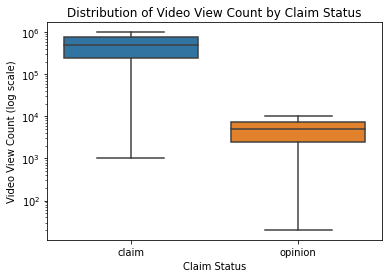

In [11]:
# create a boxplot to visualize disparity between claim and opinion `video_view_count` 

# create boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='claim_status', y='video_view_count', data=data)
plt.xlabel('Claim Status')
plt.ylabel('Video View Count (log scale)')
plt.yscale('log')
plt.title('Distribution of Video View Count by Claim Status')

plt.show()

Test whether there is still a difference in the distributions (log scale) of claim and opinion video view data 

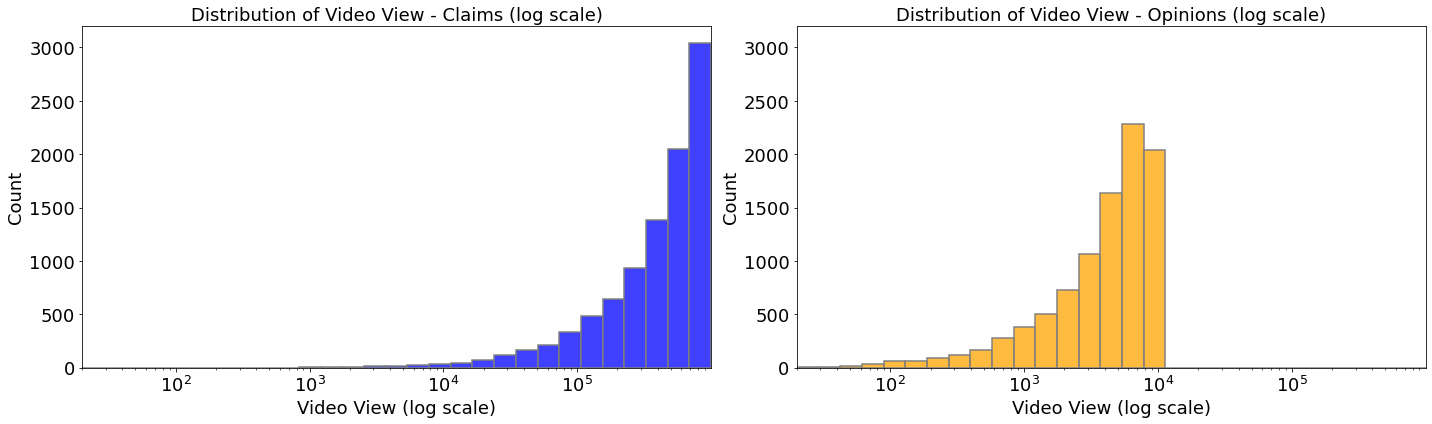

In [12]:
# visualize the extent of the difference between claim and opinion distributions by plotting on same axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

font_size = 18

# adjust bins with logspace for better visualization
bins = np.logspace(np.log10(data['video_view_count'].min()), 
                   np.log10(data['video_view_count'].max()), 
                   30) 

# histogram for claim videos
sns.histplot(data=data[data['claim_status'] == 'claim'], x='video_view_count', 
             bins=bins, ax=ax1, color='blue', edgecolor='gray', linewidth=1.5)
ax1.set_title('Distribution of Video View - Claims (log scale)', fontsize=font_size)
ax1.set_xscale('log') # used for wide distribution comparison
ax1.set_xlabel('Video View (log scale)', fontsize=font_size)
ax1.set_ylabel('Count', fontsize=font_size)
ax1.tick_params(axis='x', labelsize=font_size)
ax1.tick_params(axis='y', labelsize=font_size)

# histogram for opinion vidos
sns.histplot(data=data[data['claim_status'] == 'opinion'], x='video_view_count', 
             bins=bins, ax=ax2, color='orange', edgecolor='gray', linewidth=1.5)
ax2.set_title('Distribution of Video View - Opinions (log scale)', fontsize=font_size)
ax2.set_xscale('log') # used for wide distribution
ax2.set_xlabel('Video View (log scale)', fontsize=font_size)
ax2.set_ylabel('Count', fontsize=font_size)
ax2.tick_params(axis='x', labelsize=font_size)
ax2.tick_params(axis='y', labelsize=font_size)

# set the same x and y limits for both plots
xlim = (data['video_view_count'].min(), data['video_view_count'].max())
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)

ylim = (0, max(ax1.get_ylim()[1], ax2.get_ylim()[1]))
ax1.set_ylim(ylim)
ax2.set_ylim(ylim)

plt.tight_layout()
plt.show()

Quantify the difference in claim composition between verified and unverified users 

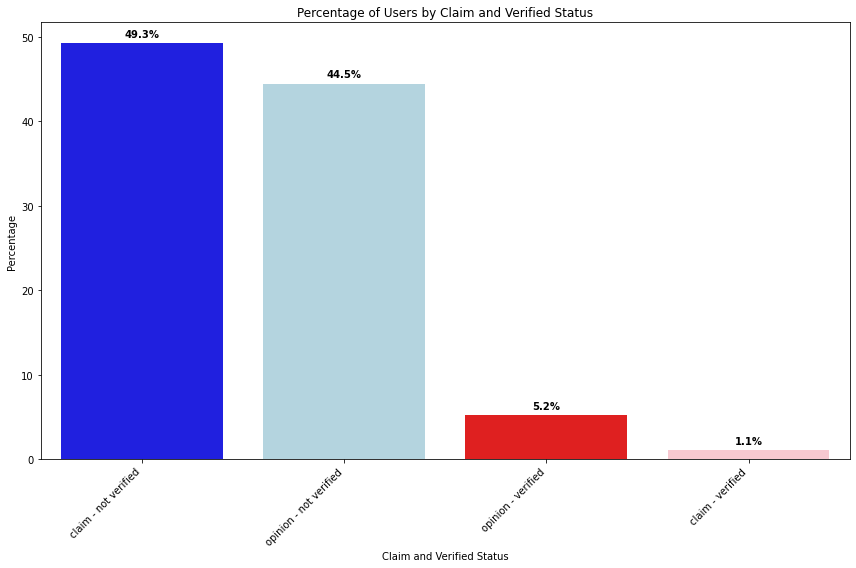

In [13]:

# create a new column combining claim_status and verified status
data['claim_verified_status'] = data['claim_status'] + ' - ' + data['verified_status']

# calculate percentages
status_counts = data['claim_verified_status'].value_counts()
status_percentages = status_counts / len(data) * 100

# set up the plot
plt.figure(figsize=(12,8))

# create a histogram of claim verified status
ax = sns.barplot(x=status_percentages.index, y=status_percentages.values, 
                 palette=['blue', 'lightblue', 'red', 'pink'])

# add labels to bars
for i, v in enumerate(status_percentages.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Claim and Verified Status')
plt.ylabel('Percentage')
plt.title('Percentage of Users by Claim and Verified Status')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Additional PACE Plan Step #2. Claim difference relevance test###

I'll test whether claim status and verified status of videos are independent -- whether the proportion of claim videos is statistically the same for both verified and unverified accounts. Using chi-square for categorical data

$H_0$: The claim status and verified status of videos are independent and the proportion of claim videos is the same for both verified and unverified accounts.

$H_A$: The claim status and verified status of videos are not independent and the proportion of claim videos is the same for both verified and unverified accounts.

In [14]:
# import package for chi-squared test
from scipy.stats import chi2_contingency

# perform chi-square test to indicate whether the relationship between claim status and verified status is significant
contingency_table = pd.crosstab(data['claim_status'], data['verified_status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

prop_table = contingency_table.div(contingency_table.sum(axis=0), axis=1)
print("Proportion Table:")
print(prop_table)
print()

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

Proportion Table:
verified_status  not verified  verified
claim_status                           
claim                0.525554  0.174167
opinion              0.474446  0.825833

Chi-square statistic: 554.0240857139472
p-value: 1.6772342420486568e-122


**Conclustion to Step #2**: Based on the company accepted significance level of .05 we can reject the null hypothesis that the proportion of claim videos is the same for both verified and unverified accounts

### Additional PACE Plan Step #3. Cluster sample###
Break down the sample by both claim label and verification status to account for potential bias introduced by the relationship between claim label and verified status

In [15]:
# separate views by claim label and verification status
verified_claim_videos = data[(data['verified_status'] == 'verified') & (data['claim_status'] == 'claim')]
unverified_claim_videos = data[(data['verified_status'] == 'not verified') & (data['claim_status'] == 'claim')]
verified_opinion_videos = data[(data['verified_status'] == 'verified') & (data['claim_status'] == 'opinion')]
unverified_opinion_videos = data[(data['verified_status'] == 'not verified') & (data['claim_status'] == 'opinion')]

### **Task 3. Hypothesis testing**

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. What are your hypotheses for this data project?

### Hypothesis for the original requested test###
$H_0$: There is no difference in the mean video view counts between verified and unverified accounts

$H_A$: There is a difference in the mean video view counts between verified and unverified accounts

### Hypothesis for z-test of proportions ### 
$H_0$: Within each labeled cluster - claim and opinion videos - the proportion of videos with above-median views is the same for verified and unverified accounts.

$H_A$: Within each labeled cluster -claim and opinion videos - the proportion of videos with above-median views is different between verified and unverified accounts.

### Hypothesis for Mann Whitney U Test of distributions ###
$H_0$: Within each labled cluster -claim and opinion videos - there is no difference in the video view count distribution between verified and unverified accounts

$H_A$: Within each labled cluster - claim and opinion videos -  there is a difference in the video view count distribution between verified and unverified accounts



Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis



# Initial required initial hypothesis 

You choose 5% as the significance level and proceed with a two-sample t-test.

In [16]:
# Conduct a two-sample t-test to compare means

# set significance level 
significance_level = 0.05

# separate the data to answer the original question
verified_views = data[data['verified_status'] == 'verified']['video_view_count']
nonverified_views = data[data['verified_status'] == 'not verified']['video_view_count']

# t-test
tstat, pvalue = stats.ttest_ind(a=verified_views, b=nonverified_views, equal_var=False)

print("initial two-sample t-test of means")
print(f'tstatistic: {tstat:}')
print(f'pvalue: {pvalue}')

initial two-sample t-test of means
tstatistic: -25.499441780633777
pvalue: 2.6088823687177823e-120


**Conclusion**: based on the non-clustered, required t-test to compare means there is sufficient evidence to reject the null hypothesis that the video view counts of verified and unverified videos are different. 

### Additional PACE Plan Step #4: Ztest of cluster proportions ###

In [17]:
# import necessary package
from statsmodels.stats.proportion import proportions_ztest

# set median views of data as significance level
median_views = data['video_view_count'].median()

# function to perform ztest for each
def perform_ztest(group1, group2):
    count1 = (group1['video_view_count'] > median_views).sum()
    nobs1 = len(group1)
    count2 = (group2['video_view_count'] > median_views).sum()
    nobs2 = len(group2)
    
    statistic, pvalue = proportions_ztest([count1, count2], [nobs1, nobs2])
    
    return statistic, pvalue

# ztest for claim videos
z_stat_claim, p_value_claim = perform_ztest(verified_claim_videos, unverified_claim_videos)

# ztest for opinion videos
z_stat_opinion, p_value_opinion = perform_ztest(verified_opinion_videos, unverified_opinion_videos)

# Print results
print("ztest results for claim videos:")
print(f"zstatistic: {z_stat_claim}")
print(f"pvalue: {p_value_claim}")

print("\nztest results for opinion videos:")
print(f"zstatistic: {z_stat_opinion}")
print(f"pvalue: {p_value_opinion}")

ztest results for claim videos:
zstatistic: 1.4684139821129645
pvalue: 0.14199180586558152

ztest results for opinion videos:
zstatistic: -0.6796782252784409
pvalue: 0.49670822638490175


**Conclusion**: I cannot reject the null hypothesis in either case. The data does not provide sufficient evidence to conclude that the proportions of above-median view videos differ between verified and unverified accounts within these clusters of claim or opinion videos

### Additional PACE Plan Step #5: Mann Whitney U test of cluster distributions ###

In [18]:
# import necessary package
from scipy.stats import mannwhitneyu

# MWU test for claim videos
stat_claim, p_value_claim = mannwhitneyu(verified_claim_videos['video_view_count'], 
                                         unverified_claim_videos['video_view_count'], 
                                         alternative='two-sided')

# MWU test for opinion videos
stat_opinion, p_value_opinion = mannwhitneyu(verified_opinion_videos['video_view_count'], 
                                             unverified_opinion_videos['video_view_count'], 
                                             alternative='two-sided')

# Print the results
print("MWU test results for claim videos:")
print(f"ustatistic: {stat_claim}")
print(f"pvalue: {p_value_claim}")

print("\nMWU test results for opinion videos:")
print(f"ustatistic: {stat_opinion}")
print(f"pvalue: {p_value_opinion}")

MWU test results for claim videos:
ustatistic: 982896.5
pvalue: 0.985908306773461

MWU test results for opinion videos:
ustatistic: 4185224.5
pvalue: 0.8147592255710869


**Conclusion**: I cannot reject the null hypothesis in either case. The data does not provide sufficient evidence to conclude that the distributions of unverfied and verified account video views differs when broken down by claim and opinion videos

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?


Required two sample t-test of means: accept

Additional Z-test of proportions: fail to reject the null hypothesis

Additional Mannn Whitney U test of distributions: fail to reject the null hypothesis


## **PACE: Execute**

Consider the questions in your PACE Strategy Documentto reflect on the Execute stage.

## **Step 4: Communicate insights with stakeholders**

*Ask yourself the following questions:*

1. What business insight(s) can you draw from the result of your hypothesis test?

The analysis requested was a two-sample t-test of means, which by definition assumes a normal distribution of data. I determined from EDA, the video view count was extremely skewed. I also determined a relationship between verified status and claim status which could lead to bias. Nonetheless, I ran a two-sample -t-test of means and found a statistically significant difference between video view count of verified and unverified creators. However, I knew we couldn't rely on the results because of the previously mentioned skewed distribution and non-random sample.  

I determined that when taking clustered samples of claim and opinion data the ztest of proportions indicated there is not sufficient evidence to conclude that the proportions of above-median view videos differ between verified and unverified accounts. Also, a Mann-Whitney U test on the clustered samples indicated there is not sufficient eveidence to conclude that the distributions of unverified and verified account videos differs when broken down by claim and opinion videos. 

The drawback of the z-test for proportions is it only speaks to a difference in proportion of the above-median videos and not the magnitude of that difference. While the MWU test didnt indicate a difference in distributions it doesn't provide a quantifiable result.

**Conclusion**:The two-sample t-test alone was not sufficient to reject the null hypothesis because of violations of probability sampling and normal distribution. In fact, I’d suggest that based on the inability to reject the null hypotheses of the z-test of proportions and Mann Whitney U test of distributions, that when isolating for claim vs opinion data, we can not say there's enough evidence to support a difference in view count purely based on differences in verification status. 

**Next steps**: I propose a regression test to better quantify the relationship between the variables. But also that we proceed, knowing that there is a statistically significant relationship between claim status and verification status.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.